In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.font_manager import FontProperties

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # 解决符号显示不正常问题


In [27]:
# 从输出文件中读取数据
with open('weather_output.txt', 'r') as file:
    lines = file.readlines()

city_info = []
# 处理每行数据
for i in range(0, len(lines), 2):  # 每两行包含一个城市的信息
    city_weather_info = lines[i].strip()
    city_lat, city_lon = map(float, lines[i + 1].split())

    city_info.append({
        "weather_info": city_weather_info,
        "latitude": city_lat,
        "longitude": city_lon
    })


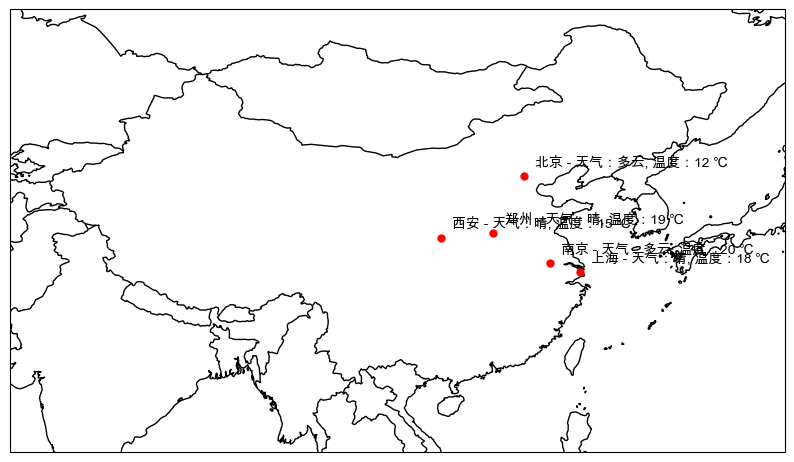

In [28]:
# 创建地图
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([70, 140, 15, 55], crs=ccrs.PlateCarree())  # 设定地图范围
ax.add_feature(cartopy.feature.BORDERS)  # 添加边界特征
ax.add_feature(cartopy.feature.COASTLINE)  # 添加海岸线特征
# 在地图上标注城市信息
for city in city_info:
    city_lat = city['latitude']
    city_lon = city['longitude']
    weather_info = city['weather_info']

    ax.plot(city_lon, city_lat, 'ro', markersize=5, transform=ccrs.PlateCarree())  # 标注城市位置
    ax.text(city_lon + 1, city_lat + 1, weather_info, transform=ccrs.PlateCarree())  # 标注城市天气信息